In [7]:
import numpy as np
import random
import gym
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pickle
import pandas as pd
from scipy.io import savemat, loadmat
import networkx as nx

In [ ]:
1/14

In [ ]:
uni_prob = 1/14
# node_request_probabilities = np.ones(14)*uni_prob + np.random.uniform(0,uni_prob*0.05, 14)

Generated perturbation on first run with seed of 9

In [ ]:
rng_np = np.random.default_rng(9)
pert = 0.5
node_request_probabilities = np.ones(14) + rng_np.uniform(-pert, pert, 14)

In [ ]:
node_request_probabilities = node_request_probabilities/np.sum(node_request_probabilities)

In [ ]:
np.sum(node_request_probabilities)

In [ ]:
node_request_probabilities

In [ ]:
pickle.dump(node_request_probabilities, open("/Users/joshnevin/RL_FOCSLab/node_req_probs/14_node_uniform_pert"+str(int(pert*100))+".pkl",'wb'))

In [33]:
non_uni = pickle.load(open("/Users/joshnevin/RL_FOCSLab/node_req_probs/14_node_uniform_pert50.pkl",'rb'))
uni = pickle.load(open("/Users/joshnevin/RL_FOCSLab/node_req_probs/14_node_uniform.pkl",'rb'))
grav = pickle.load(open("/Users/joshnevin/RL_FOCSLab/node_req_probs/nsfnet_chen_gravity.pkl",'rb'))

In [ ]:
def generate_traffic_matrix(node_reqs):
    probs = np.zeros([len(node_reqs),len(node_reqs)])
    for i in range(len(node_reqs)):
        for j in range(len(node_reqs)):
            if i < j:
                new_node_reqs = np.copy(node_reqs)
                new_node_reqs[i] = 0.
                new_node_reqs = new_node_reqs/np.sum(new_node_reqs)
                probs[i,j] = node_reqs[i] * new_node_reqs[j]
#             if i > j:
#                 new_node_reqs = np.copy(node_reqs)
#                 new_node_reqs[j] = 0.
#                 new_node_reqs = new_node_reqs/np.sum(new_node_reqs)
#                 probs[i,j] = node_reqs[i] * new_node_reqs[j]
    return probs

In [ ]:
non_uniform_matrix = generate_traffic_matrix(non_uni)

In [ ]:
# uniform_matrix = (generate_traffic_matrix(uni).round(decimals=4)*10000).astype(dtype=int)
# non_uniform_matrix = (generate_traffic_matrix(non_uni).round(decimals=4)*10000).astype(dtype=int)

In [ ]:
non_uniform_matrix.T = np.rot90(np.fliplr(non_uniform_matrix))

In [ ]:
non_uniform_matrix

In [ ]:
udf = pd.DataFrame(data=uniform_matrix[:,:],    # values
        index=node_ids,    
        columns=node_ids)  
nudf = pd.DataFrame(data=non_uniform_matrix[:,:],    # values
        index=node_ids,    
        columns=node_ids)  

In [ ]:
udf.to_latex(buf="results/uniform_traffic_matrix.txt")

In [ ]:
nudf.to_latex(buf="results/non_uniform_traffic_matrix.txt")

In [ ]:
np.sum(generate_traffic_matrix(grav))

In [ ]:
np.sum(generate_traffic_matrix(uni))

In [ ]:
np.sum(generate_traffic_matrix(non_uni))

In [ ]:
sum(grav)

In [ ]:
sum(uni)

In [ ]:
sum(non_uni)

In [30]:
traffic_dis = np.array([[0, 2, 1, 1, 1, 4, 1, 1, 2, 1, 1, 1, 1, 1],
                      [2, 0, 2, 1, 8, 2, 1, 5, 3, 5, 1, 5, 1, 4],
                      [1, 2, 0, 2, 3, 2, 11, 20, 5, 2, 1, 1, 1, 2],
                      [1, 1, 2, 0, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2],
                      [1, 8, 3, 1, 0, 3, 3, 7, 3, 3, 1, 5, 2, 5],
                      [4, 2, 2, 1, 3, 0, 2, 1, 2, 2, 1, 1, 1, 2],
                      [1, 1, 11, 2, 3, 2, 0, 9, 4, 20, 1, 8, 1, 4],
                      [1, 5, 20, 1, 7, 1, 9, 0, 27, 7, 2, 3, 2, 4],
                      [2, 3, 5, 2, 3, 2, 4, 27, 0, 75, 2, 9, 3, 1],
                      [1, 5, 2, 2, 3, 2, 20, 7, 75, 0, 1, 1, 2, 1],
                      [1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 0, 2, 1, 61],
                      [1, 5, 1, 2, 5, 1, 8, 3, 9, 1, 2, 0, 1, 81],
                      [1, 1, 1, 1, 2, 1, 1, 2, 3, 2, 1, 1, 0, 2],
                      [1, 4, 2, 2, 5, 2, 4, 4, 0, 1, 61, 81, 2, 0]])

In [ ]:
np.sum(traffic_dis*1e-3)

In [ ]:
cmdf = pd.DataFrame(data=traffic_dis,    # values
        index=node_ids,    
        columns=node_ids)  

In [ ]:
cmdf.to_latex(buf="results/chen_traffic_matrix.txt")

**Population-based traffic matrix**

In [4]:
with open('results/nsfnet_population_based_traffic_matrix.txt') as f:
    lines = f.readlines()

In [6]:
lines[0]

'    0         0.0047    0.0076    0.0009    0.0017    0.0094    0.0006    0.0039    0.0040    0.0032    0.0030    0.0063    0.0027    0.0002\n'

In [55]:
traffic_matrix = loadmat("results/T_NASFnet14.mat")["T"]

In [56]:
np.sum(traffic_matrix)

1.0000000000000002

In [57]:
traffic_matrix

array([[0.00000000e+00, 4.72507286e-03, 7.55893111e-03, 9.47735873e-04,
        1.71418259e-03, 9.43777825e-03, 5.76469254e-04, 3.87881130e-03,
        3.96463318e-03, 3.23870419e-03, 3.04186207e-03, 6.31979131e-03,
        2.66923956e-03, 2.02162290e-04],
       [4.72507286e-03, 0.00000000e+00, 1.56559532e-02, 1.96640870e-03,
        3.55593927e-03, 1.95376915e-02, 1.19620556e-03, 8.04162869e-03,
        8.21936750e-03, 6.71569707e-03, 6.30786275e-03, 1.30937766e-02,
        5.53571389e-03, 4.19539981e-04],
       [7.55893111e-03, 1.56559532e-02, 0.00000000e+00, 3.14705194e-03,
        5.68960075e-03, 3.11867124e-02, 1.91463345e-03, 1.28582345e-02,
        1.31420835e-02, 1.07402456e-02, 1.00886193e-02, 2.09206731e-02,
        8.85468438e-03, 6.71588513e-04],
       [9.47735873e-04, 1.96640870e-03, 3.14705194e-03, 0.00000000e+00,
        7.13069318e-04, 3.93034255e-03, 2.39761085e-04, 1.61402567e-03,
        1.64975793e-03, 1.34754276e-03, 1.26560542e-03, 2.63068300e-03,
        1.110

In [27]:
def traffic_mat_to_node_probs(traffic_matrix, num_nodes):
    node_probs= []
    col_probs =[]
    row_probs = []
    for row in range(num_nodes):
        row_probs.append(np.sum(traffic_matrix[row]))
    for col in range(num_nodes):
        col_probs.append(np.sum(traffic_matrix[:,col]))
    for node in range(num_nodes):
        node_row_prob = row_probs[node]
        node_col_prob = col_probs[node]
        node_probs.append((node_col_prob+node_col_prob)/2)
    return node_probs

In [39]:
node_probs_pop = traffic_mat_to_node_probs(traffic_matrix, 14)

In [36]:
sum(grav - traffic_mat_to_node_probs(traffic_dis*1e-3, 14))

0.0010000099999999575

In [40]:
node_probs_pop

[0.04827537383225997,
 0.09497085748716223,
 0.14242901168299796,
 0.020646572311125867,
 0.03675682753012166,
 0.1700350557615174,
 0.012654063181249658,
 0.07942417313305905,
 0.0810297870742051,
 0.06724190832958478,
 0.06342232903675615,
 0.1225453221543787,
 0.05609726903570729,
 0.004471449449874337]

In [25]:
pickle.dump(node_probs_pop, open("/Users/joshnevin/RL_FOCSLab/node_req_probs/nsfnet_population.pkl",'wb'))

In [52]:
traffic_matrix_rounded = (traffic_matrix.round(decimals=4)*1e4).astype(dtype=int)

In [53]:
node_ids = np.arange(1,15,1)
pmdf = pd.DataFrame(data=traffic_matrix_rounded,    # values
        index=node_ids,    
        columns=node_ids)  
pmdf.to_latex(buf="results/population_traffic_matrix.txt")

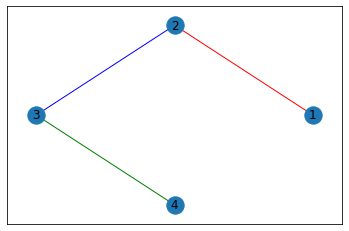

In [6]:
G = nx.Graph()
G.add_edge(1,2,color='r',weight=1)
G.add_edge(2,3,color='b',weight=1)
G.add_edge(3,4,color='g',weight=1)

pos = nx.circular_layout(G)

edges = G.edges()
colors = [G[u][v]['color'] for u,v in edges]
weights = [G[u][v]['weight'] for u,v in edges]

nx.draw_networkx(G, pos, edge_color=colors, width=weights)